## Schedule:

- Wed 29 Nov: project presentations
- Mon 4 Dec: project presentations
- Wed 6 Dec: regular class (topic TBA)
- Mon 11 Dec: in-class work session and Q/A
- Wed 13 Dec: in-class work session and Q/A
- Thu 14 Dec: final projects due

# Beyond notebooks

*(CU Boulder GEOL 3600/5700 Introduction to Python Programming, Nov 2023)*

### Goals

- Use an interactive IPython or Python console
- Write and run .py scripts

## Notebook pros and cons

- Pros
  - Combines code, text, images, & graphical output
  - Great for documenting workflows
  - Easy to play around, test out ideas
- Cons
  - Harder to "launch and leave" for long jobs
  - Running cells out of order can cause confusion
  - Persistence of variables defined in prior runs can make debugging harder
  
Sometimes the overhead of a notebook isn't needed for a quick line or two of code.

For larger problems, sometimes a start-to-finish code is better handled in a separate .py file.

## The interactive Python console

- Interactive Python console allows you to run one line of code at a time
- Useful for quick calculations or tests
- Two available consoles:
  - Regular Python console
  - Interactive "IPython" ("I" = "interactive") console
- To run an IPython console from a Jupyter Lab instance, use the Launcher
- To run a console from a terminal:
  - `python` (regular)
  - `ipython` (interactive)
  
(Pro tip: use IPython over regular Python if you have it installed)

### EXERCISE: launching a console on the Hub

- Go to the launcher and select one of the options under "Console"
- Try running single lines of code, like `print("Hello, world!")`
- Try running multiple lines in a single code block

## Working with the terminal / shell

- Before the invention of Graphical User Interfaces (GUI) like Windows and MacOS, the normal way to interact with a computer was through commands typed in a "terminal" interface

- MacOS, Windows, and Linux operating systems all provide such interfaces
  - Mac: the **Terminal** application (under **Applications/Utilities**): UNIX shell commands
  - Windows: **Command Prompt**: DOS (Disk Operating System) shell commands
  - Linux: shells are a basic part of the OS

- For an experienced user, interacting through a terminal interface can be faster than using a GUI
  

### EXERCISE: working with a terminal

- Go the launcher and select "Terminal" (under "Other")
- Try out the following commands:
  - `pwd` (present working directory)
  - `ls` (list files)
  - `ls -a` (list all files and directories, including hidden ones)
  - `ls -l` (get a long-format list of files and directories, with date, size, permission codes, etc.)
  - `man ls` (get user manual information for the `ls` command)
  - `man cd` (get user manual information for the `cd` command)
  - `cd <directory-name>` (change directory)
  - `cd ..` (go up one directory level)
  - `cd ~` (change to your home directory)
  - `whoami` (report your user name)
  - `man cp` (get user manual information for the `cp` command)
  - `cp <file> <new-name>` (make a copy of a file with a different name)
  - `man rm` (get user manual information for the `rm` command)
    - BE CAREFUL WITH `rm`: REMOVAL IS PERMANENT!

These are all UNIX operating system commands. DOS has slightly different commands; for example, it uses `dir` instead of `ls`, and file paths (the sequence of folders and subfolders that describe a file's location) use backslashes `\` instead of forward slashes `/`.

## Running shell commands from a notebook

From time to time it's useful to run shell commands directly from a notebook. You can do this using an exclamation point `!` as the first character. For example:

In [14]:
!ls -al

total 311200
drwxr-xr-x  40 gtucker  staff      1280 Nov 27 10:29 .
drwxr-xr-x  12 gtucker  staff       384 Nov  8 10:30 ..
drwxr-xr-x  23 gtucker  staff       736 Nov 26 14:13 .ipynb_checkpoints
-rw-r--r--   1 gtucker  staff     89015 Oct 23 09:45 010_Plotting_Matplotlib.ipynb
-rw-r--r--@  1 gtucker  staff    739772 Aug 29 09:40 01a_course_intro.ipynb
-rw-r--r--@  1 gtucker  staff  14854995 Aug 27 12:30 01b_earth_history_overview.ipynb
-rw-r--r--   1 gtucker  staff   3862376 Sep  7 14:17 02_Operators.ipynb
-rw-r--r--   1 gtucker  staff     11600 Jul 22 18:56 02a_earth_energy_balance.ipynb
-rw-r--r--   1 gtucker  staff    231275 Oct  3 14:31 03_variables_data_types.ipynb
-rw-r--r--   1 gtucker  staff  18679282 Sep 20 09:44 04ListsandDictionaries.ipynb
-rw-r--r--@  1 gtucker  staff   9678295 Sep 20 09:43 05_working_with_functions.ipynb
-rw-r--r--   1 gtucker  staff   1821410 Sep 20 09:44 06WritingFunctions.ipynb
-rw-r--r--   1 gtucker  staff    856458 Oct 23 09:45 07_branching.ipynb
-rw

## Running an IPython console in the terminal

If IPython is installed, running it in a terminal is just a matter of entering `ipython`.

To exit, type `exit`

Try this out:
- Run ipython in a terminal
- Define a variable
- Print its value
- Exit from the ipython console using `exit`


## Running Python programs outside of notebooks

To create a stand-alone Python program (i.e., not inside a notebook), simply write your code in a text-format file with the extension `.py`.

To run it, invoke the Python interpreter and give it the name of your `.py` file as an argument.

Example: suppose you have a file called `hello.py` that contains the line `print("Hello there!")`. You can run this program from a terminal window via:

```
python hello.py
```

Try it out.

### EXERCISE

For a slightly longer example, here's a copy of the 1D hillslope evolution simulation that we built together in a previous class. Our aim now is to convert this to a stand-alone Python program and test it out. Note that there are some modifications to the original. In particular, instead of plotting the output, the program now writes the final profile to a text file using the numpy function `savetxt()`.

- Use the Launcher to open a new Python file
- Paste in the code below
- Save the file as `hillslope1d.py`
- Use the command line to run the program: `python hillslope1d.py`

```
"""
hillslope1d.py: program to simulate the evolution of a hillslope
profile in 1D, based on the diffusion equation.

(This is an example of a HEADER DOCSTRING - very useful for documentation!)
"""

# INITIALIZE

# Import packages
import numpy as np

print("Initializing...", end="")

# Define parameters
save_file_name = "hillslope_output.txt"
Kc = 0.01 # creep coefficient, m2/y
boundary_lowering_rate = 0.0001 # rate of boundary lowering, m/y
starting_height = 1600.0 # initial elevation, m
num_nodes = 101 # number of nodes
dx = 10.0 # spacing between nodes, m
dt = 5000.0 # time step duration, y
num_steps = 4000 # number of time steps

# Create data structures
x = np.arange(0, dx * num_nodes, dx)
height = np.zeros(num_nodes) + starting_height

print("done.")


# RUN

print("Running...", end="")

for _ in range(1, num_steps + 1):
    
    # lower the boundaries
    height[0] -= boundary_lowering_rate * dt
    height[-1] -= boundary_lowering_rate * dt

    # calculate gradients
    grad = np.diff(height) / dx

    # calculate soil fluxes
    soil_flux = -Kc * grad
    
    # calculate flux divergence
    dqdx = np.diff(soil_flux) / dx
    
    # update elevations
    height[1:-1] -= dqdx * dt
    
print("done.")


# FINALIZE

print("Finalizing...", end="")

# Save the height and distance to a text file
data = np.array([height, x])
np.savetxt(save_file_name, data)

print("done.")
```

Now that we've run the program, we can read in its output and plot it:

Text(0, 0.5, 'Elevation (m)')

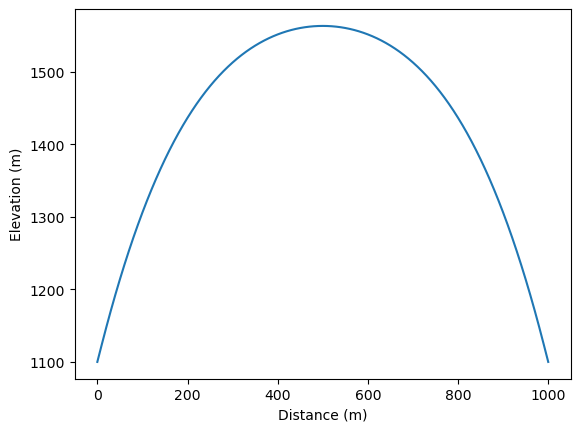

In [13]:
# Read in the output
data = np.loadtxt(save_file_name)
x = data[1,:]
height = data[0,:]

# Plot resulting landform
plt.plot(x, height)
plt.xlabel("Distance (m)")
plt.ylabel("Elevation (m)")

This is an example of a recommended practice, especially for larger/slower codes: separate the calculation code from the plotting/analysis code.

## Review

You should now be able to:
- Use an interactive Python console
- Write a Python script as a `.py` file
- Run a Python script from a terminal / command prompt

## Optional, if time: introduction to git and GitHub

- `git`: a command-based version control system created by Linux inventor Linus Torvalds

- `GitHub`: a web-based hosting platform for working with `git` repositories, run by a for-profit subsidiary of Microsoft (BitBucket is a similar platform)

See: [https://github.com/csdms/ivy/tree/main/lessons/git](https://github.com/csdms/ivy/tree/main/lessons/git)